# **📘 Assignment 2: Mastering Big Data Handling**

TIEW CHUAN RONG

DANIAL HARRIZ BIN MOHD ASINEH @MOHD ASNEH

**Install kagglehub[pandas-datasets]:**

-Installs the core kagglehub package, which can download and use datasets hosted on Kaggle using code and support loading datasets as Pandas DataFrames.

In [4]:
!pip install kagglehub[pandas-datasets]

**Install kaggle:**

This is used to install the official Kaggle API Python package called kaggle.


In [5]:
!pip install kaggle


In [6]:
!pip install psutil

**Upload kaggle.json:**

This is the API token file that contains user Kaggle credentials.As Kaggle requires authentication for most API operations to verify user. To permission to download datasets

In [7]:
from google.colab import files
files.upload()  # Select the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiewrong","key":"ff4f31306f849e9c50230749305a156a"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



# **Task 1: Dataset Selection**

**Download dataset:**

Dowload dataset from kaggle using kaggle command. We download from `ismetsemedov/transactions`. Then, unzip the zip file downloaded.

In [9]:
!kaggle datasets download ismetsemedov/transactions --unzip -p ./transactions


Dataset URL: https://www.kaggle.com/datasets/ismetsemedov/transactions
License(s): apache-2.0
100% 751M/754M [00:03<00:00, 219MB/s]
100% 754M/754M [00:03<00:00, 249MB/s]


# **Task 2: Load and Inspect Data**

In [2]:
import pandas as pd
import psutil
import os
import time

**Load data:**

Load the data normally using pandas library with pd.read_csv(). Then record the processing time and memory usage.

In [3]:
file_path = './transactions/synthetic_fraud_data.csv'

process = psutil.Process(os.getpid())

# Measure memory before loading
start_time = time.time()

# Read in chunks
df1 = pd.read_csv(file_path)

end_time = time.time()
mem_use =df1.memory_usage(deep=True).sum() / (1024**2)  # in MB

# Results

print(f"Processing Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage Increase: {mem_use:.2f} MB")




Processing Time: 89.09 seconds
Memory Usage Increase: 9062.15 MB


### Shape of the dataset

In [4]:
df1.shape

(7483766, 24)

### Top 5 rows of the Dataframe

In [12]:
df1.head(5)

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,...,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,...,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


### Column names of the DataFrame

In [13]:
df1.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'merchant_category', 'merchant_type', 'merchant', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'card_present', 'device',
       'channel', 'device_fingerprint', 'ip_address', 'distance_from_home',
       'high_risk_merchant', 'transaction_hour', 'weekend_transaction',
       'velocity_last_hour', 'is_fraud'],
      dtype='object')

### Datatypes of each column in the DataFrame

In [14]:
print(df1.dtypes)

transaction_id          object
customer_id             object
card_number              int64
timestamp               object
merchant_category       object
merchant_type           object
merchant                object
amount                 float64
currency                object
country                 object
city                    object
city_size               object
card_type               object
card_present              bool
device                  object
channel                 object
device_fingerprint      object
ip_address              object
distance_from_home       int64
high_risk_merchant        bool
transaction_hour         int64
weekend_transaction       bool
velocity_last_hour      object
is_fraud                  bool
dtype: object


# **Task3: Apply Big Data Handling Strategies**

**Load Less data:**

We applied the technique of loading less data by selecting columns that we will be using only. This loading less dataset will improve the efficiency of loading dataset. We loading less data by using usecol parameter in the pd.read_csv() to read only required columns data.



In [3]:
import pandas as pd
import time
import os
import psutil

# -------------------------
# 1. Load Less Data
# -------------------------
file_path = './transactions/synthetic_fraud_data.csv'
print("\n🟢 Load Less Data: Loading SELECTED columns...")
use_columns = [
    'transaction_id', 'customer_id', 'merchant_category',
    'merchant_type', 'merchant', 'amount', 'country',
    'high_risk_merchant', 'velocity_last_hour', 'is_fraud'
]

start_time_sel = time.time()
df_sel = pd.read_csv(file_path, usecols=use_columns)
end_time_sel = time.time()
mem_use = df_sel.memory_usage(deep=True).sum() / (1024**2)
time_sel = end_time_sel - start_time_sel
mem_sel = mem_use
print(f"[Selected Columns] Time: {time_sel:.2f}s | Memory: {mem_sel:.2f}MB")




🟢 Load Less Data: Loading SELECTED columns...
[Selected Columns] Time: 62.19s | Memory: 4347.03MB


**Use Chunking:**

 The data was read in chunks using the chunksize parameter of pandas.read_csv(). This approach allows loading and processing the data in smaller, manageable portions rather than reading the entire file at once. The chunk size is set to 100000 for every chunk

In [10]:
import pandas as pd
import psutil
import os
import time
import tracemalloc

file_path = './transactions/synthetic_fraud_data.csv'
chunk_size = 100000
process = psutil.Process(os.getpid())
# -------------------------
# 2. Use Chunking
# -------------------------
print("\n🟢 Use Chunking: Reading in chunks...")
tracemalloc.start()
start_time_chunk = time.time()
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    pass

end_time_chunk = time.time()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
mem_chunk = current/(1024 ** 2)

time_chunk = end_time_chunk - start_time_chunk
print(f"[Chunking] Time: {time_chunk:.2f}s | Memory: {mem_chunk:.2f}MB")




🟢 Use Chunking: Reading in chunks...
[Chunking] Time: 162.15s | Memory: 48.51MB


**Optimize Data Type:**

We using the optimize data type by converting the data type to a smaller data type. Optimized data types were specified explicitly when reading the dataset using the dtype parameter in pandas.read_csv(). Columns were assigned the most appropriate and memory-efficient data types

In [6]:
import pandas as pd
import psutil
import os
import time

file_path = './transactions/synthetic_fraud_data.csv'
process = psutil.Process(os.getpid())

# -------------------------
# 3. Optimize Data Types
# -------------------------
print("\n🟢 Optimize Data Types...")
dtypes = {
    'transaction_id': 'category',
    'customer_id': 'category',
    'card_number': 'int32',
    'merchant_category': 'category',
    'merchant_type': 'category',
    'merchant': 'category',
    'amount': 'float32',
    'currency': 'category',
    'country': 'category',
    'city': 'category',
    'city_size': 'category',
    'card_type': 'category',
    'card_present': 'bool',
    'device': 'category',
    'channel': 'category',
    'device_fingerprint': 'category',
    'ip_address': 'category',
    'distance_from_home': 'int32',
    'high_risk_merchant': 'bool',
    'transaction_hour': 'int8',
    'weekend_transaction': 'bool',
    'is_fraud': 'bool'
}
parse_dates = ['timestamp']

start_time_opt = time.time()
df_opt = pd.read_csv(file_path, dtype=dtypes, parse_dates=parse_dates)
end_time_opt = time.time()
mem_opt = df_opt.memory_usage(deep=True).sum() / (1024**2)
time_opt = end_time_opt - start_time_opt

print(f"[Optimized Dtypes] Time: {time_opt:.2f}s | Memory: {mem_opt:.2f}MB")


🟢 Optimize Data Types...
[Optimized Dtypes] Time: 229.73s | Memory: 3981.57MB


**Sampling:**

 A random sampling technique was applied to the dataset. A 10% sample of the original data was extracted using the pandas.read_csv() function with randomly selected rows.

In [7]:
import pandas as pd
import numpy as np
import psutil
import os
import time

file_path = './transactions/synthetic_fraud_data.csv'
process = psutil.Process(os.getpid())

# -------------------------
# 4. Sampling
# -------------------------
print("\n🟢 Sampling 10% of the dataset...")
sample_frac = 0.1
n_total = sum(1 for _ in open(file_path)) - 1
n_sample = int(n_total * sample_frac)
skip = sorted(np.random.choice(np.arange(1, n_total + 1), size=n_total - n_sample, replace=False))
start_time_sample = time.time()
df_sample = pd.read_csv(file_path, skiprows=skip)
end_time_sample = time.time()
time_sample = end_time_sample - start_time_sample
mem_sample = df_sample.memory_usage(deep=True).sum() / (1024**2)
print(f"[Sampling] Time: {time_sample:.2f}s | Memory: {mem_sample:.2f}MB")



🟢 Sampling 10% of the dataset...
[Sampling] Time: 27.03s | Memory: 906.22MB


# **Task4: Comparative Analysis**

**Graphs**

In this part we used matplotlib to plot bar chart to visualize the comparison between different optimize technique used in terms of processing time and memory usage.

<ipython-input-11-5e9ff343c2eb>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(methods, rotation=15, ha='right')
<ipython-input-11-5e9ff343c2eb>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(methods, rotation=15, ha='right')


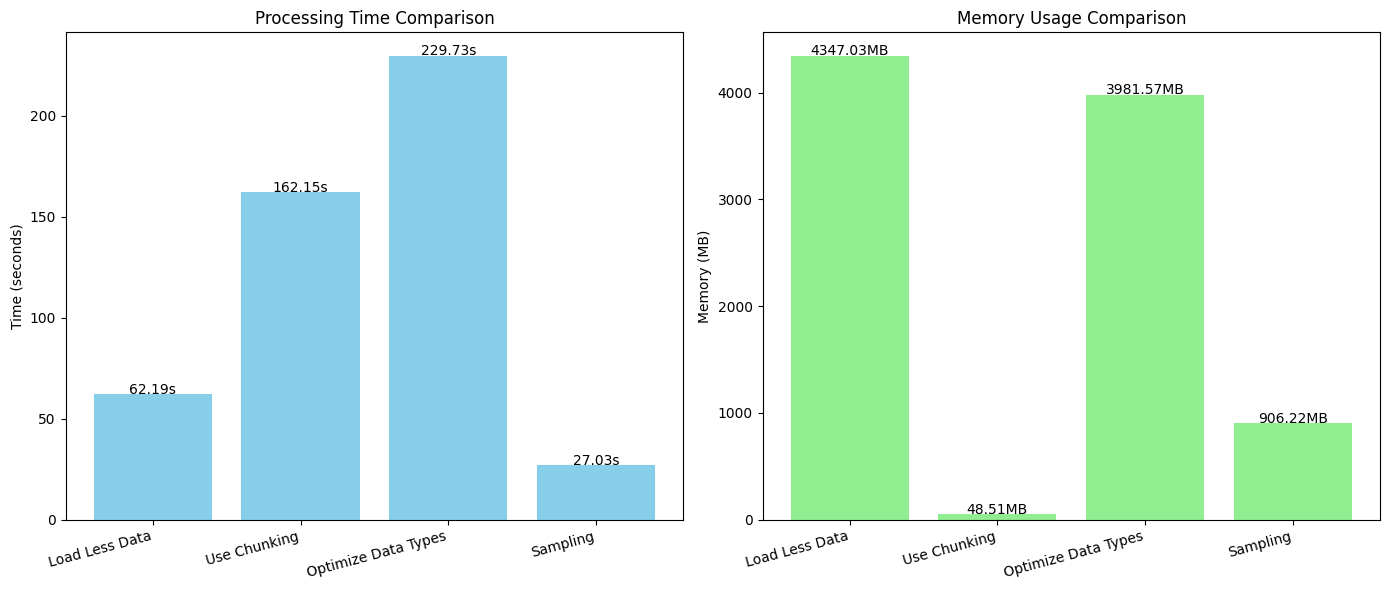

In [11]:
import pandas as pd
import numpy as np
import psutil
import os
import time
import tracemalloc
import matplotlib.pyplot as plt

# -------------------------
# Plotting Results
# -------------------------
methods = ['Load Less Data', 'Use Chunking', 'Optimize Data Types', 'Sampling']
processing_times = [time_sel, time_chunk, time_opt, time_sample]
memory_usages = [mem_sel, mem_chunk, mem_opt, mem_sample]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart: Processing Time
ax[0].bar(methods, processing_times, color='skyblue')
ax[0].set_title('Processing Time Comparison')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_xticklabels(methods, rotation=15, ha='right')
for i, v in enumerate(processing_times):
    ax[0].text(i, v + 0.1, f"{v:.2f}s", ha='center')

# Bar chart: Memory Usage
ax[1].bar(methods, memory_usages, color='lightgreen')
ax[1].set_title('Memory Usage Comparison')
ax[1].set_ylabel('Memory (MB)')
ax[1].set_xticklabels(methods, rotation=15, ha='right')
for i, v in enumerate(memory_usages):
    ax[1].text(i, v + 1, f"{v:.2f}MB", ha='center')

plt.tight_layout()
plt.show()
